<a href="https://colab.research.google.com/github/Kostiantyn-Liapkalo/RNN_LSTM_Keras/blob/Main/hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM

In [2]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 7

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


Simple_RNN

In [3]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(SimpleRNN(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 30s 337ms/step - loss: 0.6950 - acc: 0.5174 - val_loss: 0.6837 - val_acc: 0.5723
Epoch 2/7
69/69 [==============================] - 19s 272ms/step - loss: 0.6594 - acc: 0.6133 - val_loss: 0.5924 - val_acc: 0.7235
Epoch 3/7
69/69 [==============================] - 18s 263ms/step - loss: 0.5360 - acc: 0.7582 - val_loss: 0.5561 - val_acc: 0.7137
Epoch 4/7
69/69 [==============================] - 19s 267ms/step - loss: 0.4535 - acc: 0.8084 - val_loss: 0.4227 - val_acc: 0.8165
Epoch 5/7
69/69 [==============================] - 19s 270ms/step - loss: 0.4047 - acc: 0.8327 - val_loss: 0.3862 - val_acc: 0.8376
Epoch 6/7
69/69 [==============================] - 21s 299ms/step - loss: 0.3500 - acc: 0.8618 - val_loss: 0.3738 - val_acc: 0.8465
Epoch 7/7
69/69 [==============================] - 19s 272ms/step - loss: 0.3413 - acc: 0.8668 - val_loss: 0.4083 - val_acc: 0.8391

Total training time: 149.17 seconds


LSTM

In [4]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_lstm = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 49s 678ms/step - loss: 0.6893 - acc: 0.5551 - val_loss: 0.6690 - val_acc: 0.6784
Epoch 2/7
69/69 [==============================] - 42s 604ms/step - loss: 0.5545 - acc: 0.7356 - val_loss: 0.4044 - val_acc: 0.8340
Epoch 3/7
69/69 [==============================] - 47s 682ms/step - loss: 0.4121 - acc: 0.8303 - val_loss: 0.3344 - val_acc: 0.8681
Epoch 4/7
69/69 [==============================] - 41s 602ms/step - loss: 0.3353 - acc: 0.8681 - val_loss: 0.3552 - val_acc: 0.8507
Epoch 5/7
69/69 [==============================] - 41s 598ms/step - loss: 0.2990 - acc: 0.8819 - val_loss: 0.3714 - val_acc: 0.8355
Epoch 6/7
69/69 [==============================] - 47s 680ms/step - loss: 0.2689 - acc: 0.8956 - val_loss: 0.3060 - val_acc: 0.8792
Epoch 7/7
69/69 [==============================] - 42s 617ms/step - loss: 0.2436 - acc: 0.9092 - val_loss: 0.5563 - val_acc: 0.8152

Total training time: 324.61 seconds


Bidirectional_LSTM

In [5]:
from keras.layers import Bidirectional

start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bidirectional = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 107s 1s/step - loss: 0.6916 - acc: 0.5326 - val_loss: 0.6882 - val_acc: 0.5132
Epoch 2/7
69/69 [==============================] - 77s 1s/step - loss: 0.6051 - acc: 0.6837 - val_loss: 0.4940 - val_acc: 0.7833
Epoch 3/7
69/69 [==============================] - 76s 1s/step - loss: 0.4446 - acc: 0.8107 - val_loss: 0.4357 - val_acc: 0.7943
Epoch 4/7
69/69 [==============================] - 76s 1s/step - loss: 0.3736 - acc: 0.8493 - val_loss: 0.3354 - val_acc: 0.8651
Epoch 5/7
69/69 [==============================] - 75s 1s/step - loss: 0.3190 - acc: 0.8788 - val_loss: 0.3989 - val_acc: 0.8397
Epoch 6/7
69/69 [==============================] - 75s 1s/step - loss: 0.2861 - acc: 0.8903 - val_loss: 0.4352 - val_acc: 0.7985
Epoch 7/7
69/69 [==============================] - 74s 1s/step - loss: 0.2623 - acc: 0.8987 - val_loss: 0.2904 - val_acc: 0.8852

Total training time: 567.71 seconds


Deep_LSTM

In [6]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_deep = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 138s 2s/step - loss: 0.6926 - acc: 0.5118 - val_loss: 0.6881 - val_acc: 0.6144
Epoch 2/7
69/69 [==============================] - 129s 2s/step - loss: 0.5767 - acc: 0.6979 - val_loss: 0.4667 - val_acc: 0.7979
Epoch 3/7
69/69 [==============================] - 127s 2s/step - loss: 0.4153 - acc: 0.8166 - val_loss: 0.3987 - val_acc: 0.8248
Epoch 4/7
69/69 [==============================] - 130s 2s/step - loss: 0.3293 - acc: 0.8675 - val_loss: 0.3427 - val_acc: 0.8557
Epoch 5/7
69/69 [==============================] - 133s 2s/step - loss: 0.2928 - acc: 0.8849 - val_loss: 0.3204 - val_acc: 0.8743
Epoch 6/7
69/69 [==============================] - 126s 2s/step - loss: 0.2606 - acc: 0.9008 - val_loss: 0.3542 - val_acc: 0.8635
Epoch 7/7
69/69 [==============================] - 133s 2s/step - loss: 0.2394 - acc: 0.9101 - val_loss: 0.3294 - val_acc: 0.8823

Total training time: 928.55 seconds


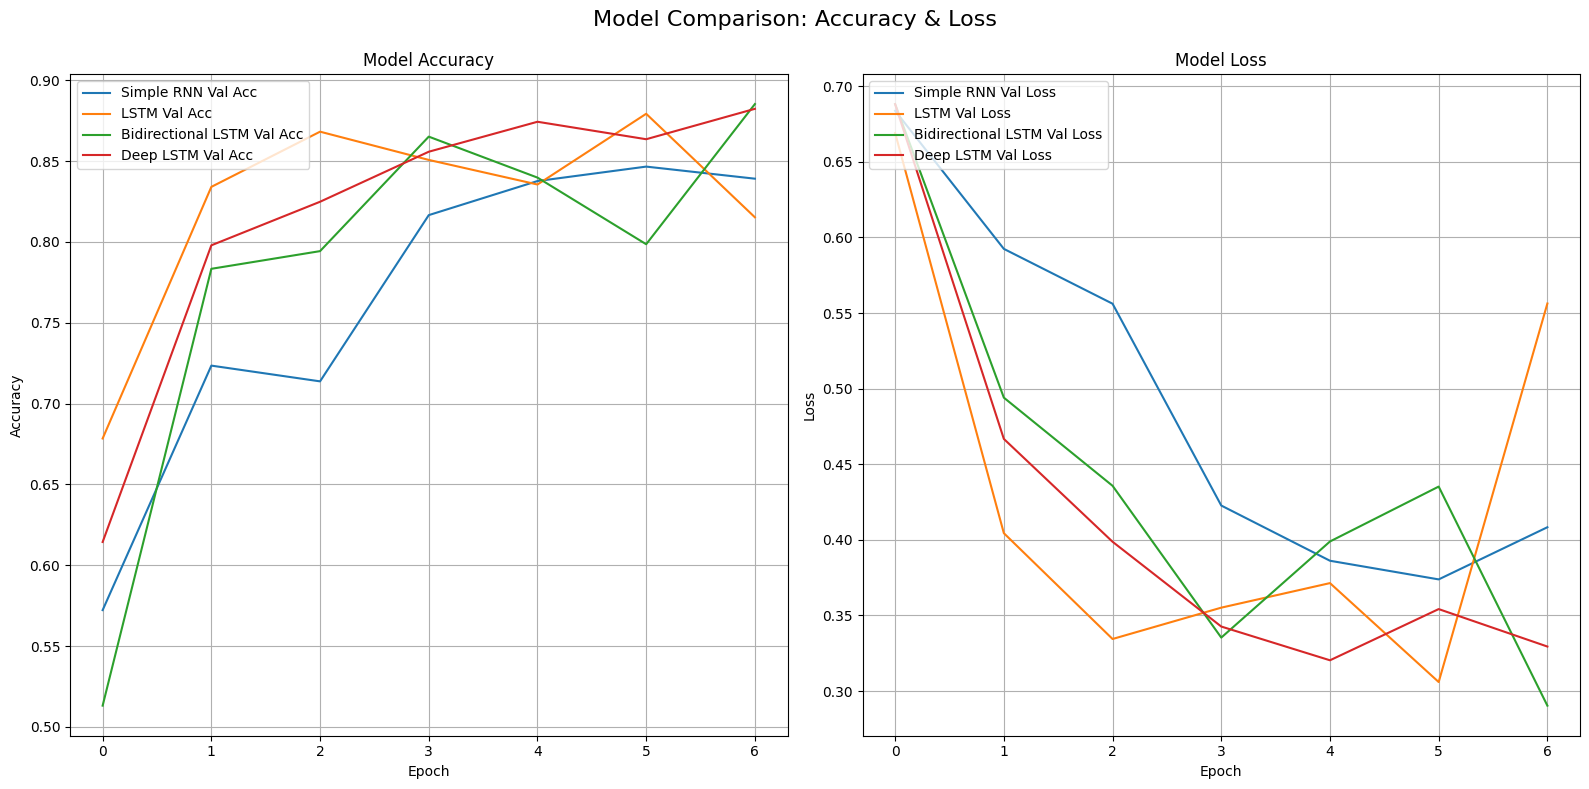

In [19]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(16, 8))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    for name, history in histories:

        plt.plot(history.history['val_acc'], label=f'{name} Val Acc')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    # Loss subplot
    plt.subplot(1, 2, 2)
    for name, history in histories:

        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


plot_history(histories, 'Model Comparison: Accuracy & Loss')

In [16]:
# Список історій для порівняння
histories = [
    ("Simple RNN", history_rnn),
    ("LSTM", history_lstm),
    ("Bidirectional LSTM", history_bidirectional),
    ("Deep LSTM", history_deep)
]

for name, history in histories:

    train_acc = history.history['acc'][-1]
    _, test_acc = history.model.evaluate(input_test, y_test, verbose=0)

    print(f"{name}:")
    print(f"Train accuracy: {train_acc:.4f} | Test accuracy: {test_acc:.4f} | Difference accuracy: {(train_acc - test_acc)*100:.2f}%")
    print("-"*75)

Simple RNN:
Train accuracy: 0.8668 | Test accuracy: 0.8318 | Difference accuracy: 3.50%
---------------------------------------------------------------------------
LSTM:
Train accuracy: 0.9092 | Test accuracy: 0.8062 | Difference accuracy: 10.30%
---------------------------------------------------------------------------
Bidirectional LSTM:
Train accuracy: 0.8987 | Test accuracy: 0.8806 | Difference accuracy: 1.81%
---------------------------------------------------------------------------
Deep LSTM:
Train accuracy: 0.9101 | Test accuracy: 0.8723 | Difference accuracy: 3.77%
---------------------------------------------------------------------------


Серед усіх моделей точність LSTM є найнижчою 80,62% та має середній час навчання 324.61 seconds. Bidirectional LSTM, Deep LSTM приблизно однаковий результат. Найкраща модель Simple_RNN, яка показала точність 83,18% і найменьший час навчання 149.17 seconds. imdb виявився складним датасетом для високої точності.